#### Copyright 2017 Google LLC.

 # Pandas 간단 소개

**학습 목표:**
  * *pandas* 라이브러리의 `DataFrame` 및 `Series` 데이터 구조에 관한 소개 확인하기
  * `DataFrame` 및 `Series` 내의 데이터 액세스 및 조작
  * *pandas* `DataFrame`으로 CSV 데이터 가져오기
  * `DataFrame`의 색인을 다시 생성하여 데이터 셔플

 [*Pandas*](http://Pandas.pydata.org/)는 열 중심 데이터 분석 API입니다. 입력 데이터를 처리하고 분석하는 데 효과적인 도구이며, 여러 ML 프레임워크에서도 *Pandas* 데이터 구조를 입력으로 지원합니다.
*Pandas* API를 전체적으로 소개하려면 길어지겠지만 중요한 개념은 꽤 간단하므로 아래에서 소개하도록 하겠습니다. 전체 내용을 참조할 수 있도록 [*Pandas* 문서 사이트](http://pandas.pydata.org/pandas-docs/stable/index.html)에서 광범위한 문서와 여러 가이드를 제공하고 있습니다.

 ## 기본 개념

다음 행은 *Pandas* API를 가져와서 API 버전을 출력합니다.

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.3'

 *Pandas*의 기본 데이터 구조는 두 가지 클래스로 구현됩니다.

  * **`DataFrame`**은 행 및 이름 지정된 열이 포함된 관계형 데이터 테이블이라고 생각할 수 있습니다.
  * **`Series`**는 하나의 열입니다. `DataFrame`에는 하나 이상의 `Series`와 각 `Series`의 이름이 포함됩니다.

데이터 프레임은 데이터 조작에 일반적으로 사용하는 추상화입니다. [Spark](https://spark.apache.org/) 및 [R](https://www.r-project.org/about.html)에 유사한 구현이 존재합니다.

 `Series`를 만드는 한 가지 방법은 `Series` 객체를 만드는 것입니다. 예를 들면 다음과 같습니다.

In [3]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [4]:
pd.Series(['NC', '두산', 'KT', 'LG', '키움', 'KIA', '롯데', '삼성', 'SK', '한화'])

0     NC
1     두산
2     KT
3     LG
4     키움
5    KIA
6     롯데
7     삼성
8     SK
9     한화
dtype: object

 `DataFrame` 객체는 `string` 열 이름과 매핑되는 'dict'를 각각의 `Series`에 전달하여 만들 수 있습니다. `Series`의 길이가 일치하지 않는 경우, 누락된 값은 특수 [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 값으로 채워집니다. 예를 들면 다음과 같습니다.

In [5]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [6]:
Team_names = pd.Series(['NC', '두산', 'KT', 'LG', '키움', 'KIA', '롯데', '삼성', 'SK', '한화'])
HomeTown_names = pd.Series(['창원', '서울', '수원', '서울', '서울', '광주', '부산', '대구', '인천', '대전'])
pd.DataFrame( {'팀 이름' : Team_names, '연고지' : HomeTown_names})

,팀 이름,연고지
0,NC,창원
1,두산,서울
2,KT,수원
3,LG,서울
4,키움,서울
5,KIA,광주
6,롯데,부산
7,삼성,대구
8,SK,인천
9,한화,대전


 하지만 대부분의 경우 전체 파일을 `DataFrame`으로 로드합니다. 다음 예는 캘리포니아 부동산 데이터가 있는 파일을 로드합니다. 다음 셀을 실행하여 데이터에 로드하고 기능 정의를 만들어 보세요.

In [7]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 위의 예에서는 `DataFrame.describe`를 사용하여 `DataFrame`에 관한 흥미로운 통계를 보여줍니다. 또 다른 유용한 함수는 `DataFrame.head`로, `DataFrame` 레코드 중 처음 몇 개만 표시합니다.

In [8]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [9]:
california_housing_dataframe.head(10)
# head 함수는 괄호 안의 숫자 만큼 위에서부터 출력한다, 디폴트값은 5이다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [11]:
california_housing_dataframe.tail(3)
# head 함수는 괄호 안의 숫자 만큼 밑에서부터 출력한다, 디폴트값은 5이다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


 *Pandas*의 또 다른 강력한 기능은 그래핑입니다. 예를 들어 `DataFrame.hist`를 사용하면 한 열에서 값의 분포를 빠르게 검토할 수 있습니다.

In [13]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

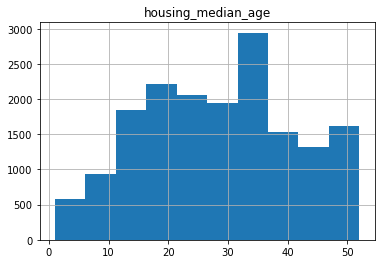

In [14]:
california_housing_dataframe.hist('housing_median_age')

 ## 데이터 액세스

익숙한 Python dict/list 작업을 사용하여 `DataFrame` 데이터에 액세스할 수 있습니다.

In [15]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [16]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [17]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [28]:
KBO_2020_Final_Record = pd.DataFrame( {'팀 이름' : Team_names, '연고지' : HomeTown_names} )
print(type(KBO_2020_Final_Record))
KBO_2020_Final_Record[:6]

<class 'pandas.core.frame.DataFrame'>


,팀 이름,연고지
0,NC,창원
1,두산,서울
2,KT,수원
3,LG,서울
4,키움,서울
5,KIA,광주


 또한 *Pandas*는 고급 [색인 생성 및 선택](http://Pandas.pydata.org/Pandas-docs/stable/indexing.html) 기능을 위한 풍부한 API를 제공합니다. 이 내용은 너무 광범위하므로 여기에서 다루지 않습니다.

 ## 데이터 조작

Python의 기본 산술 연산을 `Series`에 적용할 수도 있습니다. 예를 들면 다음과 같습니다.

In [29]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

 [NumPy](http://www.numpy.org/)는 유명한 계산과학 툴킷입니다. *Pandas* `Series`는 대부분의 NumPy 함수에 인수로 사용할 수 있습니다.

In [30]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 더 복잡한 단일 열 변환에는 `Series.apply`를 사용할 수 있습니다. Python [map 함수](https://docs.python.org/2/library/functions.html#map)처럼, 
`Series.apply`는 인수로 [lambda 함수](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)를 허용하며, 이는 각 값에 적용됩니다.

아래의 예에서는 `인구`가 백만 명을 초과하는지 나타내는 새 `Series`를 만듭니다.

In [31]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 
`DataFrames` 수정 역시 간단합니다. 예를 들어 다음 코드는 기존 `DataFrame`에 두 개의 `Series`를 추가합니다.

In [32]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [33]:
KBO_2020_Final_Record['최종순위'] = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
KBO_2020_Final_Record['골든글러브 멤버수'] = pd.Series([2, 1, 3, 1, 2, 1, 0, 0, 0, 0])
KBO_2020_Final_Record

,팀 이름,연고지,최종순위,골든글러브 멤버수
0,NC,창원,1,2
1,두산,서울,2,1
2,KT,수원,3,3
3,LG,서울,4,1
4,키움,서울,5,2
5,KIA,광주,6,1
6,롯데,부산,7,0
7,삼성,대구,8,0
8,SK,인천,9,0
9,한화,대전,10,0


 ## 실습 #1

다음 두 명제 *모두* True인 경우에만 True인 새 부울 열을 추가하여 `도시` 테이블을 수정합니다.

  * 도시 이름은 성인의 이름을 본따서 지었다.
  * 도시 면적이 130제곱킬로미터보다 넓다.

**참고:** 부울 `Series`는 기존 부울 연산자가 아닌 비트 연산자를 사용하여 결합할 수 있습니다. 예를 들어 *logical and*를 실행할 때 `and` 대신 `&`를 사용합니다.

**참고:** 스페인어에서 "San"은 "성인"의 의미입니다.

In [35]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


 ## 색인
`Series`와 `DataFrame` 객체 모두 식별자 값을 각 `Series` 항목이나 `DataFrame` 행에 할당하는 `index` 속성을 정의합니다. 

기본적으로 생성 시 *Pandas*는 소스 데이터의 순서를 나타내는 색인 값을 할당합니다. 생성된 이후 색인 값은 고정됩니다. 즉, 데이터의 순서가 재정렬될 때 변하지 않습니다.

In [36]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [37]:
cities.index

RangeIndex(start=0, stop=3, step=1)

 `DataFrame.reindex`를 호출하여 수동으로 행의 순서를 재정렬합니다. 예를 들어 다음은 도시 이름을 기준으로 분류하는 것과 효과가 같습니다.

In [38]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


 색인 재생성은 `DataFrame`을 섞기(임의 설정하기) 위한 좋은 방법입니다. 아래의 예에서는 배열처럼 된 색인을 NumPy의 `random.permutation` 함수에 전달하여 값을 섞습니다. 이렇게 섞인 배열로 `reindex`를 호출하면 `DataFrame` 행도 같은 방식으로 섞입니다.
다음 셀을 여러 번 실행해 보세요.

In [43]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


 자세한 정보는 [색인 문서](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects)를 참조하세요.

In [44]:
index = pd.Index( ['e', 'd', 'a', 'b'] )
index

Index(['e', 'd', 'a', 'b'], dtype='object')

In [46]:
'd' in index
# index를 굳이 숫자가 아닌 문자로도 가능하다.

True

In [47]:
index = pd.Index(list(range(5)), name = 'rows')
columns = pd.Index(['A', 'B', 'C'], name = 'columns')
df = pd.DataFrame(np.random.randn(5, 3), index = index, columns = columns)
df

columns,A,B,C
rows,,,
0,-1.779608,0.240354,-0.526718
1,-0.254721,2.240828,0.887141
2,-1.212297,-0.145819,1.282734
3,1.841203,0.794799,-1.041610
4,-0.747120,-0.403761,-0.518589


 ## 실습 #2

`reindex` 메서드는 원래 `DataFrame`의 색인 값에 없는 색인 값을 허용합니다. 메서드를 실행해보고 이런 값을 사용하면 어떤 결과가 나오는지 확인해보세요. 왜 이런 값이 허용된다고 생각하나요?

In [50]:
cities.reindex([0, 5, 2, 1, 3])
# reindex 입력 배열에 원래의 DataFrame 색인 값에 없는 값을 포함하면 reindex가 없는 색인에 새 행을 추가하고 해당 열을 NaN값으로 채운다.
# 아래의 경우, index 5와 3에 해당하는 내용은 없기 때문에, 입력받은 index를 유지하고, 해당 행의 내용을 모두 NaN으로 채운다.

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False
1,San Jose,1015785.0,176.53,5754.177760,True
3,NaN,NaN,NaN,NaN,NaN


 색인은 보통 실제 데이터에서 가져온 문자열이기 때문에 이 동작이 바람직합니다([*Pandas* 색인 재생성 문서](http://Pandas.pydata.org/Pandas-docs/stable/generated/Pandas.DataFrame.reindex.html)에서 색인 값이 브라우저 이름인 예제 참조).

이 경우 \'누락된\' 색인을 허용하면 외부 목록을 사용하여 쉽게 색인을 다시 생성할 수 있으므로, 입력 처리에 대해 걱정하지 않아도 됩니다.